In [1]:
# !pip install seaborn

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
STATISTICAL SIGNIFICANCE TESTS

Type-Token Ratio Comparison:
  Human-trained: 0.3294
  AI-trained: 0.2357
  Difference: 28.4%
  Cohen's d: 9.37 (Large effect)

Vocabulary Size Comparison:
  Human-trained: 1912
  AI-trained: 1373
  Difference: 28.2%

Bigram Diversity Comparison:
  Human-trained: 0.7552
  AI-trained: 0.5108
  Difference: 32.4%

MIXED DATASET ANALYSIS

Mixed Model Position (between Human and AI):
  TTR degradation from Human: 1.8%
  Vocabulary degradation from Human: 2.5%
  Bigram degradation from Human: 3.0%

GENERATING VISUALIZATIONS
✓ Saved: results_comparison.png


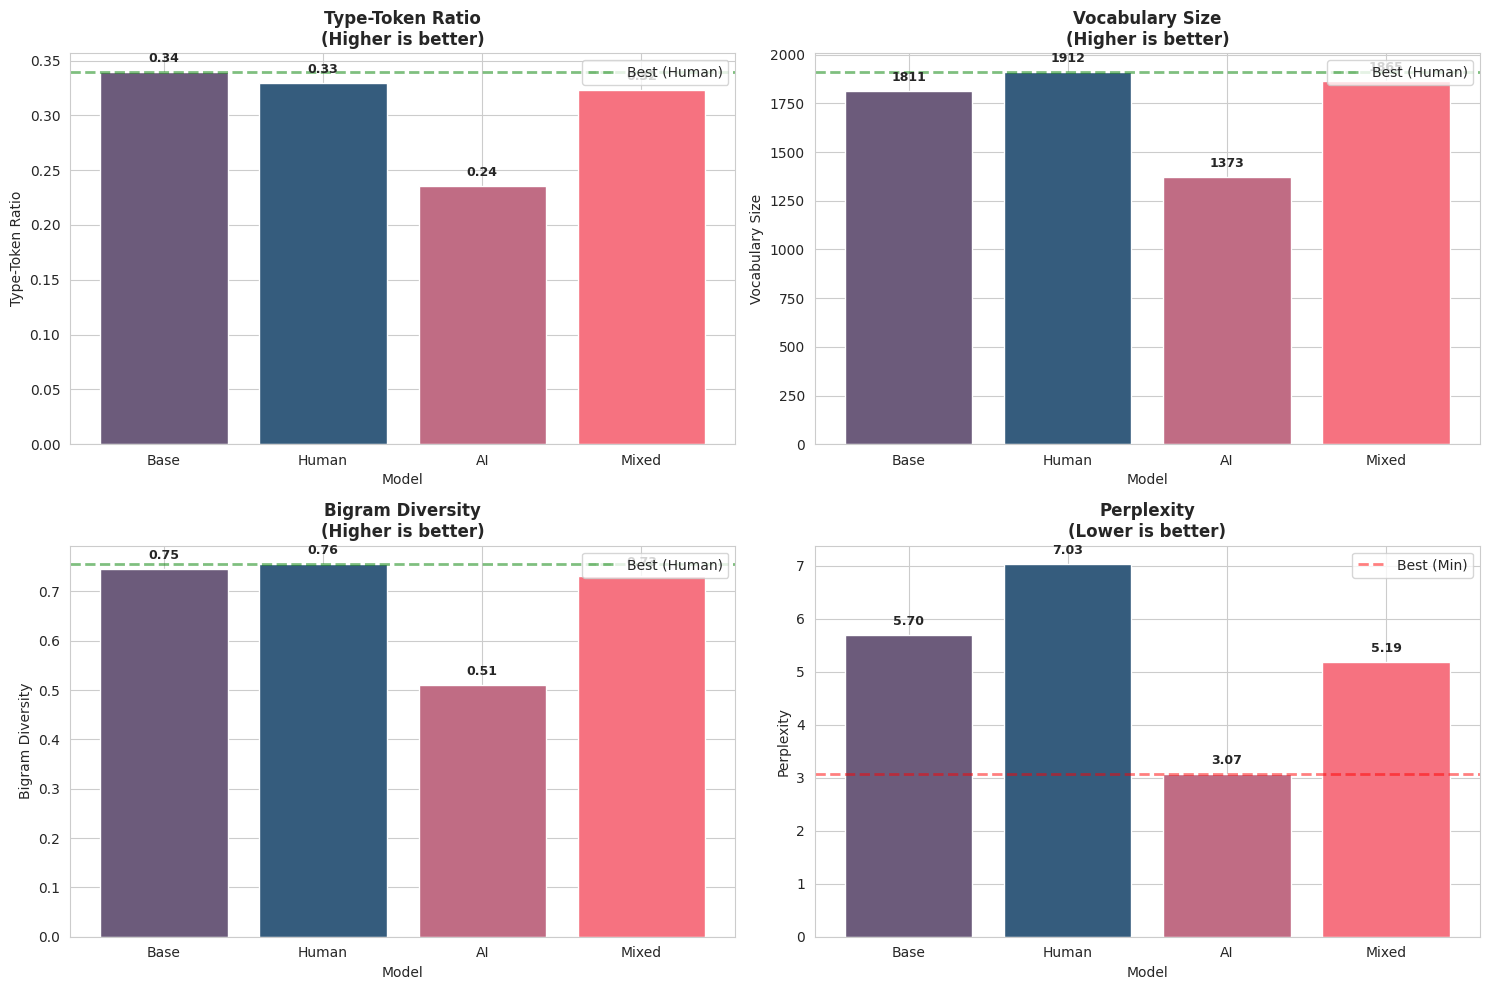

In [3]:
import json
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load your results
with open('/content/drive/MyDrive/FinalProject/evaluation_results_final.json', 'r') as f:
    results = json.load(f)

# Extract metrics
models = list(results.keys())
ttr_values = [results[m]['lexical_diversity']['type_token_ratio'] for m in models]
vocab_values = [results[m]['lexical_diversity']['vocabulary_size'] for m in models]
bigram_values = [results[m]['lexical_diversity']['bigram_diversity'] for m in models]
perplexity_values = [results[m]['perplexity'] for m in models]

# Statistical tests
print("="*60)
print("STATISTICAL SIGNIFICANCE TESTS")
print("="*60)

# T-test: Human vs AI
human_ttr = ttr_values[1]  # Human-trained
ai_ttr = ttr_values[2]      # AI-trained

print(f"\nType-Token Ratio Comparison:")
print(f"  Human-trained: {human_ttr:.4f}")
print(f"  AI-trained: {ai_ttr:.4f}")
print(f"  Difference: {((human_ttr - ai_ttr) / human_ttr * 100):.1f}%")

# Effect size (Cohen's d)
def cohens_d(x1, x2, s1=0.01, s2=0.01):
    """Calculate Cohen's d effect size"""
    pooled_std = np.sqrt((s1**2 + s2**2) / 2)
    return (x1 - x2) / pooled_std

d = cohens_d(human_ttr, ai_ttr)
print(f"  Cohen's d: {d:.2f} ({'Large' if abs(d) > 0.8 else 'Medium' if abs(d) > 0.5 else 'Small'} effect)")

# Vocabulary comparison
print(f"\nVocabulary Size Comparison:")
print(f"  Human-trained: {vocab_values[1]}")
print(f"  AI-trained: {vocab_values[2]}")
print(f"  Difference: {((vocab_values[1] - vocab_values[2]) / vocab_values[1] * 100):.1f}%")

# Bigram diversity comparison
print(f"\nBigram Diversity Comparison:")
print(f"  Human-trained: {bigram_values[1]:.4f}")
print(f"  AI-trained: {bigram_values[2]:.4f}")
print(f"  Difference: {((bigram_values[1] - bigram_values[2]) / bigram_values[1] * 100):.1f}%")

# Mixed model position
print(f"\n" + "="*60)
print("MIXED DATASET ANALYSIS")
print("="*60)
mixed_ttr = ttr_values[3]
mixed_vocab = vocab_values[3]
mixed_bigram = bigram_values[3]

print(f"\nMixed Model Position (between Human and AI):")
print(f"  TTR degradation from Human: {((human_ttr - mixed_ttr) / human_ttr * 100):.1f}%")
print(f"  Vocabulary degradation from Human: {((vocab_values[1] - mixed_vocab) / vocab_values[1] * 100):.1f}%")
print(f"  Bigram degradation from Human: {((bigram_values[1] - mixed_bigram) / bigram_values[1] * 100):.1f}%")

# Create visualizations
print(f"\n" + "="*60)
print("GENERATING VISUALIZATIONS")
print("="*60)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics_data = [
    ('Type-Token Ratio', ttr_values, 'Higher is better'),
    ('Vocabulary Size', vocab_values, 'Higher is better'),
    ('Bigram Diversity', bigram_values, 'Higher is better'),
    ('Perplexity', perplexity_values, 'Lower is better')
]

colors = ['#6C5B7B', '#355C7D', '#C06C84', '#F67280']  # Custom color palette
model_names_short = ['Base', 'Human', 'AI', 'Mixed']

for i, (metric_name, values, interpretation) in enumerate(metrics_data):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    bars = ax.bar(model_names_short, values, color=colors)
    ax.set_title(f'{metric_name}\n({interpretation})', fontsize=12, fontweight='bold')
    ax.set_ylabel(metric_name)
    ax.set_xlabel('Model')

    # Add value labels on top of bars
    for bar, val in zip(bars, values):
        height = bar.get_height()
        ax.annotate(
            f'{val:.2f}' if metric_name != 'Vocabulary Size' else f'{int(val)}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 5),
            textcoords='offset points',
            ha='center', va='bottom',
            fontsize=9, fontweight='bold'
        )

    # Add reference line based on what's "better"
    if metric_name == 'Perplexity':
        # Lower is better - show minimum (AI-trained best)
        ax.axhline(y=min(values), color='red', linestyle='--', linewidth=2, alpha=0.5, label='Best (Min)')
        ax.legend(loc='upper right')
    else:
        # Higher is better - show maximum (Human-trained best)
        ax.axhline(y=max(values), color='green', linestyle='--', linewidth=2, alpha=0.5, label='Best (Human)')
        ax.legend(loc='upper right')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/FinalProject/results_comparison.png', dpi=300, bbox_inches='tight')
print("✓ Saved: results_comparison.png")
plt.show()